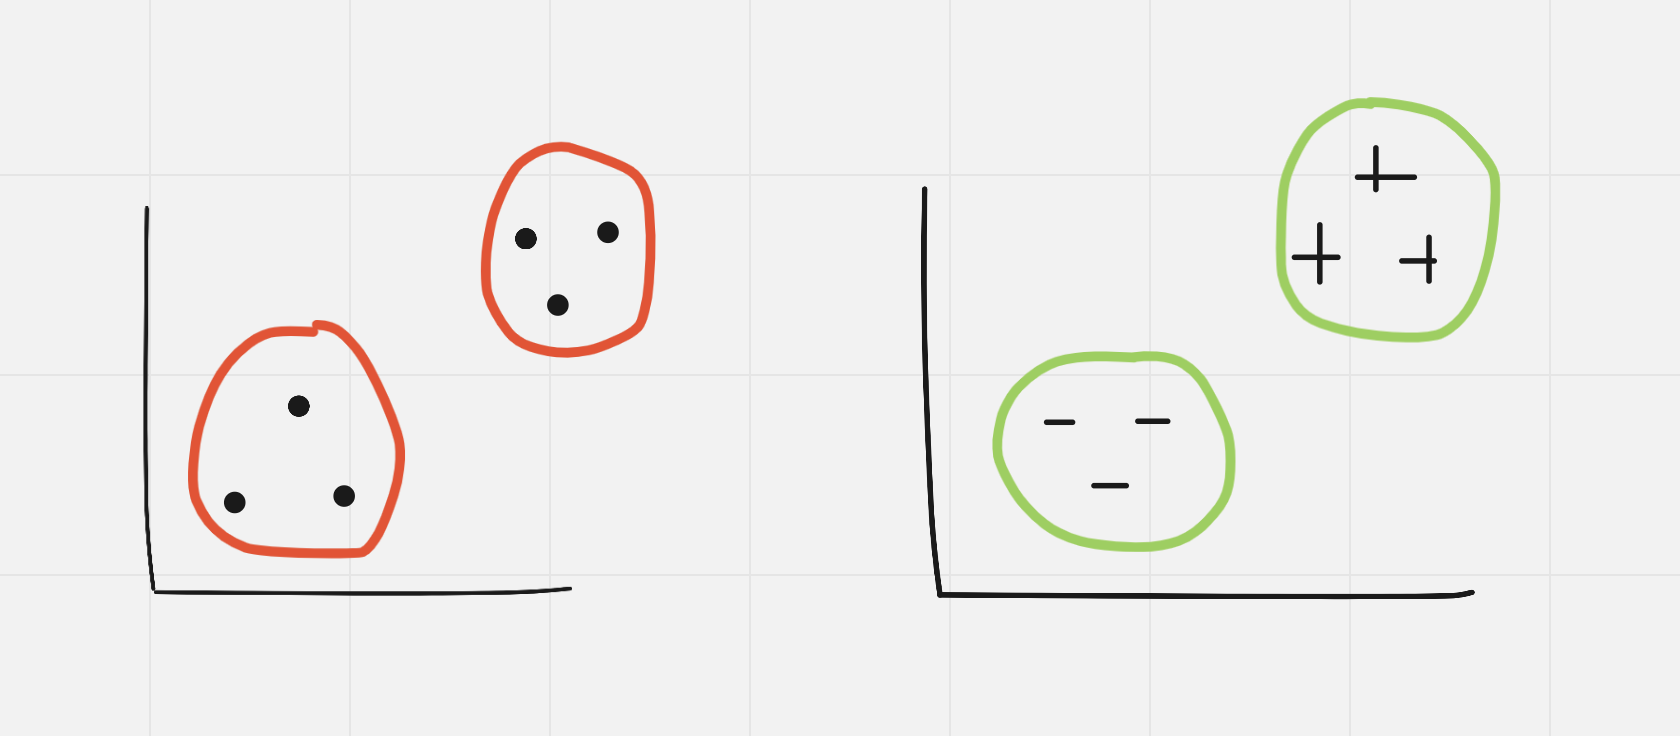

When we look at these graphs, our mind immediately divides it into two groups. Classified learning has pre-labeled data which is trained so the model identifies similar data later on. 

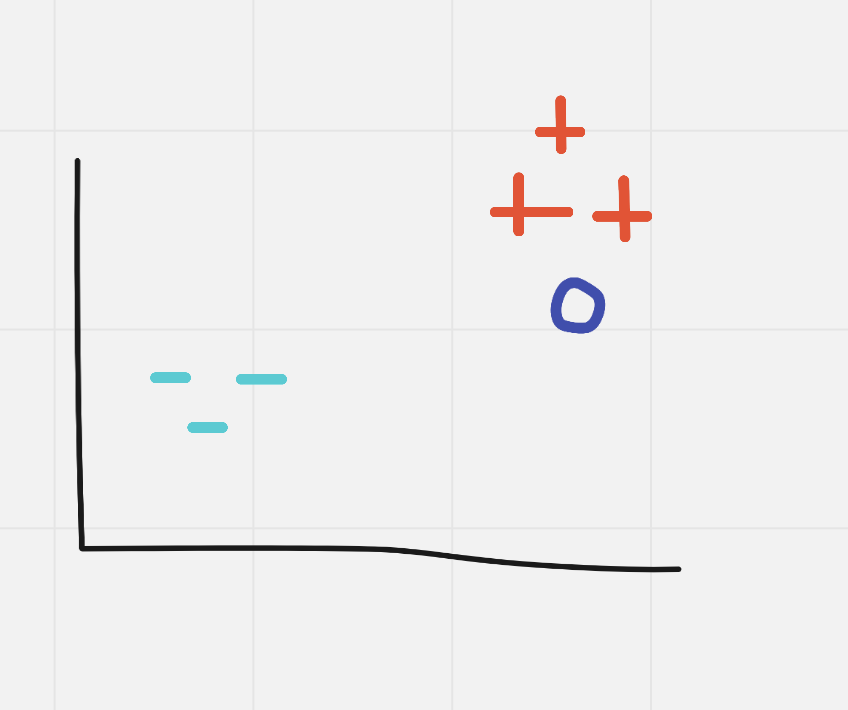

Now suppose you have this scenario where there is a dot near to the plus labeled data. So, naturally we group it with the plus data. Our classification is based on proximity to a particular type of data. The minimum distance from a group where the dot lies will determine the classification criterion.

This is the basis of k-nearest neighbours.

Here, k is the number chosen by us and then neighbours are the data points closed to our data. We are looking for a certain number of nearest neighbours. 

In [2]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.8/site-packages (1.2.0)
Note: you may need to restart the kernel to use updated packages.


## Implementing K-Nearest-Neighbours using Scikit-Learn


In [3]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

We define our features and labels

In [5]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

The features X are everything except for the class. Doing df.drop returns a new dataframe with our chosen column(s) dropped. The labels, y, are just the class column.

We create the training and testing samples

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Define the classifier i.e. K-Nearest Neighbours.

In [7]:
clf = neighbors.KNeighborsClassifier()

We train and test the classifier and obtain the accuracy.

In [8]:
clf.fit(X_test, y_test)

KNeighborsClassifier()

In [9]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9714285714285714


If we don't drop the id column i.e. we include meaningless and misleading data for training the classifier, we recieve a drop in the accuracy. Thus, adding noise can help or hurt the classification algorithm.

The accuracy drops from 97% to a mere 73%

Now, we use the classifier to predict some sample data.

As we have a more than one feature ans a single example at the same time, we need to reshape the array

In [10]:
sample = np.array([[4,2,1,1,1,2,3,2,1],[5,8,3,4,5,1,1,1,2]])
sample = sample.reshape(len(sample),-1)
prediction = clf.predict(sample)
print(prediction)

[2 2]


## Euclidean distance 

In [11]:
import math
plot1 = [1,3]
plot2 = [2,5]
ed = math.sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)
ed

2.23606797749979

### Creating K-NN Classifier from Scratch

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

In [13]:
# Creating the dataset
dataset = {'k': [[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

Here, k and r are classes and the points are the datapoints of the class

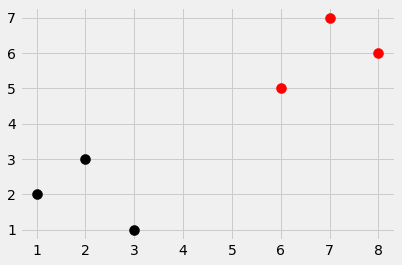

In [15]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)

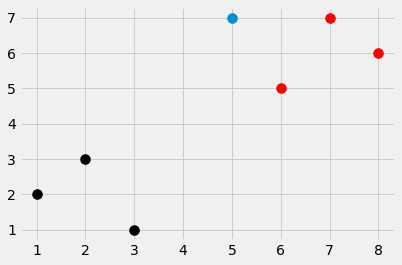

In [19]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

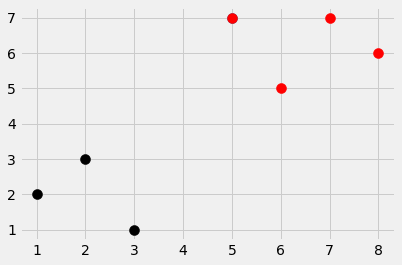

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

In [27]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()


In [28]:
import random
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

Now, we populate the train and test dictionaries

In [29]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])
    

The dictionaries are populated such that the key is the class and the values are attributes

In [30]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9496402877697842


K-Nearest Neighbours performs well on both linear as well as non-linear data, but if faces problems with outliers, scl